In [0]:
## import dependancies
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
## Define Build Model
def build_model(learning_rate):
  ## Define layes
  layer_1 = tf.keras.layers.Dense(units=1, input_shape=[1])

  model = tf.keras.Sequential([layer_1])

  model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
  
  return model

In [0]:
## define Train Model
def train_model(model,num_epochs,steps):
  history = model.fit(training_c, training_f, epochs=num_epochs, steps_per_epoch = steps, validation_data=(test_c, test_f))
  print("Finished training the model")
  return history


In [5]:
## download data
!wget --no-check-certificate \
    -O /tmp/ctof.csv 'https://raw.githubusercontent.com/technogise/your_first_neural_network_model/master/ctof.csv'


--2020-05-20 07:33:06--  https://drive.google.com/uc?export=download&id=1hS4zehGewGtSG-9IyignysvIrr_g9rf-
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.102, 74.125.195.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pf5n92ehjb861menbhf2b0nobn3tt2t4/1589959950000/03655918602299179458/*/1hS4zehGewGtSG-9IyignysvIrr_g9rf-?e=download [following]
--2020-05-20 07:33:06--  https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pf5n92ehjb861menbhf2b0nobn3tt2t4/1589959950000/03655918602299179458/*/1hS4zehGewGtSG-9IyignysvIrr_g9rf-?e=download
Resolving doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0c-a0-docs.googleusercontent.com (doc-0c

In [0]:
## load and divide data
df=pd.read_csv('/tmp/ctof.csv')
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)
training_c = train['c'].tolist()
training_f = train['f'].tolist()
test_c = test['c'].tolist()
test_f = test['f'].tolist()

In [22]:
## Execute
learning_rate = 0.1
epoch = 200
steps = 10
model = build_model(learning_rate)
history = train_model(model,epoch,steps)

Epoch 1/200
10/10 [==============================] - 0s 10ms/step - loss: 4680.8711 - root_mean_squared_error: 68.4169 - val_loss: 2055.8357 - val_root_mean_squared_error: 45.3413
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 2228.3262 - root_mean_squared_error: 47.2052 - val_loss: 778.1381 - val_root_mean_squared_error: 27.8951
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 888.2296 - root_mean_squared_error: 29.8032 - val_loss: 1275.3469 - val_root_mean_squared_error: 35.7120
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 580.9560 - root_mean_squared_error: 24.1030 - val_loss: 428.4919 - val_root_mean_squared_error: 20.7000
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 491.6967 - root_mean_squared_error: 22.1742 - val_loss: 545.3932 - val_root_mean_squared_error: 23.3537
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 336.7411 - root_mean_squared_error: 1

In [23]:
## Predict using model
print(model.predict([100.0,-40]))

[[212.00003  211.99998  212.       211.99994  211.99998  211.99998
  211.99995  211.99997  212.       211.99997  212.00002  212.00002
  212.       212.       212.00002  211.99998  212.00002  211.99998
  211.99998  212.       212.00002  212.       212.00002  211.99998
  212.       211.99998  212.       212.       211.99998  212.
  212.00003  212.       212.00003  212.00002  211.99998  211.99998
  211.99998  212.00002  212.00003  211.99998  212.00002  212.
  211.99997  212.       211.99997  212.00003  212.00003  212.
  211.99998  211.99998  212.       211.99998  212.       212.00002
  212.00002  211.99997  212.       212.00002  212.       211.99998
  212.       211.99997  211.99998  211.99998 ]
 [-40.000004 -39.999996 -40.       -39.999985 -39.999992 -39.999992
  -39.999985 -39.999992 -39.999992 -39.99999  -40.       -40.
  -40.       -39.999996 -40.       -39.999996 -40.       -39.99999
  -39.999996 -39.999996 -40.       -39.999992 -39.999996 -39.999992
  -39.999996 -39.999992 -39.99999

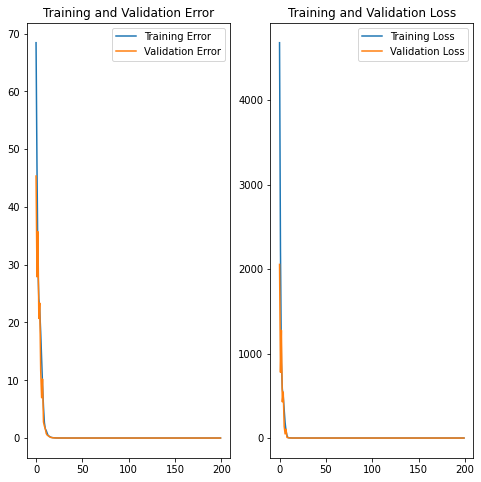

In [24]:
acc = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Error')
plt.plot(epochs_range, val_acc, label='Validation Error')
plt.legend(loc='upper right')
plt.title('Training and Validation Error')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()